In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Compare different factors in the California housing dataset

In [2]:
# Read in the California housing dataset
# <fetch_xxx()> used to import the data set
california_dataset = datasets.fetch_california_housing()
# <pd.DataFrame(data,columns)> To create a DataFrame
# <data.data> referes to the data within 'data' object
# <data.feature_names> it provides the column names for the DataFrame
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
# <.target> contains the values of the target variable, which are typically houseprices in this dataset 
# Adding new column ['MEDV'] 
housing_data['MEDV'] = california_dataset.target

In [3]:
# Reduce the dataset to remove AveRooms outliers
# <housing_data['AveRooms']<10> creates a Boolean Series for rows where the 'AveRooms' column has values less than 10.
# <housing_data.loc[condition,:]> using <.loc> selects rows based on condition
housing_data_reduced = pd.DataFrame(housing_data.loc[housing_data['AveRooms']<10,:])

# Reduce the dataset to the San Diego Area (based on approx latitude & longitude area)
# <pd.DataFrame()> to create a new DataFrame with conditions on column [Latitude] from 'housing_data_reduced'
san_diego_housing = pd.DataFrame(housing_data_reduced.loc[((housing_data_reduced['Latitude']>32.664282) & 
                                                          (housing_data_reduced['Latitude']<32.980514) &
                                                          (housing_data_reduced['Longitude']>-117.300418) &
                                                          (housing_data_reduced['Longitude']<-117.01950)),:])

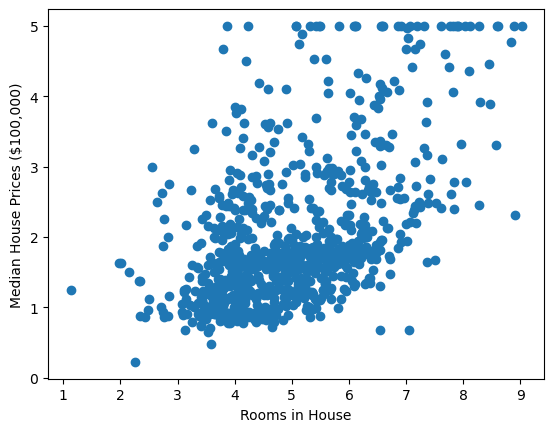

In [4]:
# Plot out rooms versus median house price
# Setting up the variable 'x_values'
x_values = san_diego_housing['AveRooms']
# Setting up the variable 'y_values'
y_values = san_diego_housing['MEDV']
# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(x_values,y_values)
# <plt.xlabel()> to label the x axis 'Rooms in House'
plt.xlabel('Rooms in House')
# <plt.ylabel()> to label the y axis 'Median House Prices ($100,000)'
plt.ylabel('Median House Prices ($100,000)')
# <plt.show()> to display plot
plt.show()

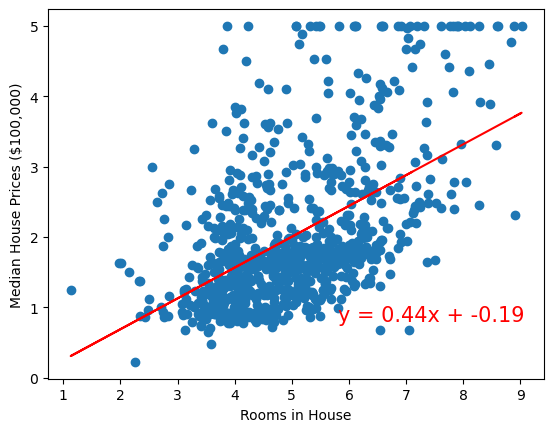

In [5]:
# Add the linear regression equation and line to plot
# Setting up the variable 'x_values'
x_values = san_diego_housing['AveRooms']
# Setting up the variable 'y_values'
y_values = san_diego_housing['MEDV']
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <slope> the slope regression line
# <intercept> representing the value of y when x is 0
# <rvalue> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pvalue> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Calculates the predicted or fitted values for each 'x' value in the dataset.
regress_values = x_values * slope + intercept
# <str(round(#, # digits rounded to))>
# same with <str(round(intercept, 2))>
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(x_values,y_values)
# <plt.plot(x,y,"color")>
plt.plot(x_values,regress_values,"r-")
# <plt.annotate()> adds an annotation )text label) to your matplotlib plot
# (5.8, 0.8) These are the coordinates where you want to place the annotation text on your plot
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# <plt.xlabel()> to label the x axis 'Rooms in House'
plt.xlabel('Rooms in House')
# <plt.ylabel()> to label the y axis 'Median House Prices ($100,000)'
plt.ylabel('Median House Prices ($100,000)')
# <plt.show()> to display plot
plt.show()

The r-squared is: 0.27748572828217377


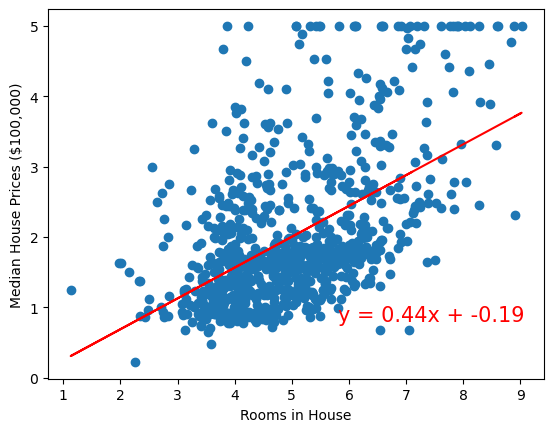

In [6]:
# Print out the r-squared value along with the plot.
# Setting up the variable 'x_values'
x_values = san_diego_housing['AveRooms']
# Setting up the variable 'y_values'
y_values = san_diego_housing['MEDV']
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <rvalue> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pvalue> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# <str(round(#, # digits rounded to))>
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(x_values,y_values)
# <plt.plot(x,y,"color")>
plt.plot(x_values,regress_values,"r-")
# <plt.annotate()> adds an annotation )text label) to your matplotlib plot
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# <plt.xlabel()> to label the x axis 'Rooms in House'
plt.xlabel('Rooms in House')
# <plt.ylabel()> to label the y axis 'Median House Prices ($100,000)'
plt.ylabel('Median House Prices ($100,000)')
# <(f"")> to print out a message
print(f"The r-squared is: {rvalue**2}")
# <plt.show()> to display plot
plt.show()

# Compare linear relationships with the diabetes dataset

In [7]:
# Read in the diabetes dataset
# <datasets.xxx()> used to import the data set
diabetes_data = datasets.load_diabetes()
# <pd.DataFrame(data,columns)> To create a DataFrame
# <data.data> referes to the data within 'data' object
# <data.feature_names> it provides the column names for the DataFrame
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
# <.target> contains the values of the target variable, which are typically houseprices in this dataset 
# Adding new column ['1Y_Disease_Progress'] 
data['1Y_Disease_Progress'] = diabetes_data.target

The r-squared is: 0.19490614314350022


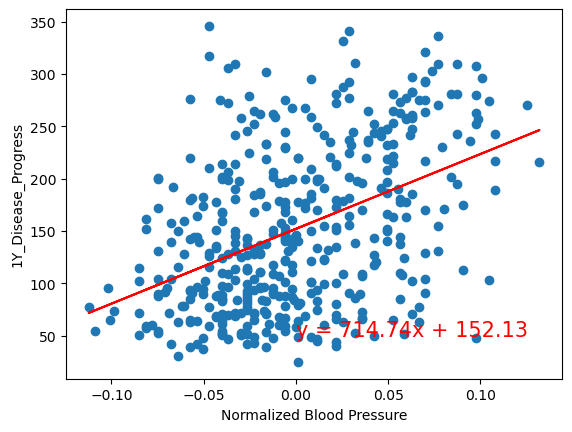

In [8]:
# Plot the different factors in a scatter plot
# Setting up the variable 'x_values'
x_values = data['bp']
# Setting up the variable 'y_values'
y_values = data['1Y_Disease_Progress']
# <linregress> funciton from scipy.stats library to perform linear regression analysis
# <rvalue> The correlation coefficient indication strength and direction of 'x_values' and 'y_values'
# <pvalue> The two sides p=value for a hypothesis test whose null hypothesis that the slope is zero
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# <plt.scatter(x,y)> is used to create a scatter plot
plt.scatter(x_values,y_values)
# <plt.plot(x,y,"color")>
plt.plot(x_values,regress_values,"r-")
# <plt.annotate()> adds an annotation )text label) to your matplotlib plot
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# <plt.xlabel()> to label the x axis 'Normalized Blood Pressure'
plt.xlabel('Normalized Blood Pressure')
# <plt.ylabel()> to label the y axis '1Y_Disease_Progress'
plt.ylabel('1Y_Disease_Progress')
# <(f"")> to print out a message
print(f"The r-squared is: {rvalue**2}")
# <plt.show()> to display plot
plt.show()